# L08: Interpolation - extrapolation
# Setup notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import scipy as sp
from scipy import interpolate
from mpl_toolkits.mplot3d import Axes3D
import sympy

# Linear Interpolation

<font size = 5>
<br>$\frac{y-y_0}{x-x_0} = \frac{y_1-y_0}{x_1-x_0}$
<p>$y = y_0 + (y_1 - y_0)\frac{x-x_0}{x_1-x_0}$
<p>$y=\frac{x_1-x}{x_1-x_0}y_0+\frac{x-x_0}{x_1-x_0}y_1$
</font>

In [2]:
x = np.linspace(1,100,10)
y = np.log(x)
df = pd.DataFrame(np.c_[x,y],columns = ['x','y'])
df.head()

,x,y
0,1.0,0.000000
1,12.0,2.484907
2,23.0,3.135494
3,34.0,3.526361
4,45.0,3.806662


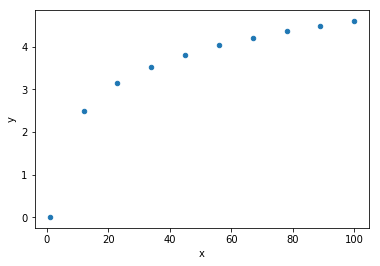

In [3]:
df.plot.scatter('x','y')
plt.show()

## Based on the given data, use linear interpolation to find x at y = 17.68

## Method 1: Manual $y = y_0 + (y_1 - y_0)\frac{x-x_0}{x_1-x_0}$

### Step 1: find the iterval that cover the point of interest

Method 1A: find the use `.argmin`

In [4]:
#find the index of the minimum distance value
#then find the index that is on the left side
val = 22
idx = np.abs(x-val).argmin()
if x[idx] > val:
    idx = idx - 1
idx

1

Method 1b: use `np.searchsorted`

In [5]:
val = 22
#np.searchsorted give the location that
#if value is inserted before this index
#the value is perserved.  
#Array has to be sorted already
idx2 = np.searchsorted(x, val) - 1
idx2

1

In [6]:
x

array([   1.,   12.,   23.,   34.,   45.,   56.,   67.,   78.,   89.,  100.])

In [7]:
y

array([ 0.        ,  2.48490665,  3.13549422,  3.52636052,  3.80666249,
        4.02535169,  4.20469262,  4.35670883,  4.48863637,  4.60517019])

In [8]:
y_ans = y[idx] + (y[idx+1] - y[idx])*(val - x[idx]) / (x[idx+1] - x[idx])
y_ans

3.0763498917344996

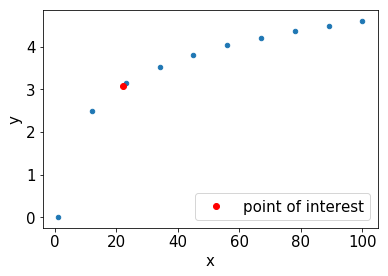

In [9]:
mpl.rc('font', **{'size': 15})
ax = df.plot.scatter('x','y')
ax.plot(val,y_ans, 'ro', label = 'point of interest')
ax.legend(loc=4)
plt.show()

# Method 2: Automatic: `numpy.interp`
Format: `np.interp(val,x,y)` val can be numpy array

In [10]:
np.interp(val,x,y)

3.0763498917345

In [11]:
ans = np.interp(list(range(100)),x,y)

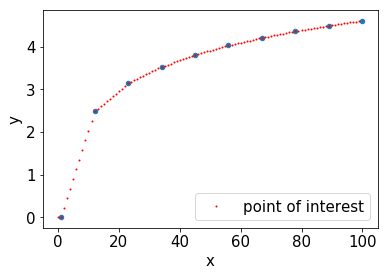

In [12]:
mpl.rc('font', **{'size': 15})
ax = df.plot.scatter('x','y')
ax.plot(list(range(100)),ans, 'ro', label = 'point of interest',markersize = 1)
ax.legend(loc=4)
plt.show()

# Linear Extrapolation
<font size = 5>
<p>$y = y_0 + (y_1 - y_0)\frac{x-x_0}{x_1-x_0}$
</font>

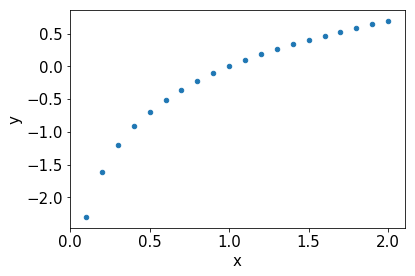

In [13]:
x = np.linspace(0.1,2,20)
y = np.log(x)
df = pd.DataFrame(np.c_[x,y],columns = ['x','y'])
df.plot.scatter('x','y')
plt.show()

In [14]:
val = 22
idx = np.searchsorted(x, val) - 1
y_ans = y[idx] + (y[idx-1] - y[idx])*(val - x[idx]) / (x[idx-1] - x[idx])
#Notice: We know that we are going to extrapolate to the right-hand side
#Therefore, we use idx-1 and idx (change idx+1 of the previous case to idx-1)

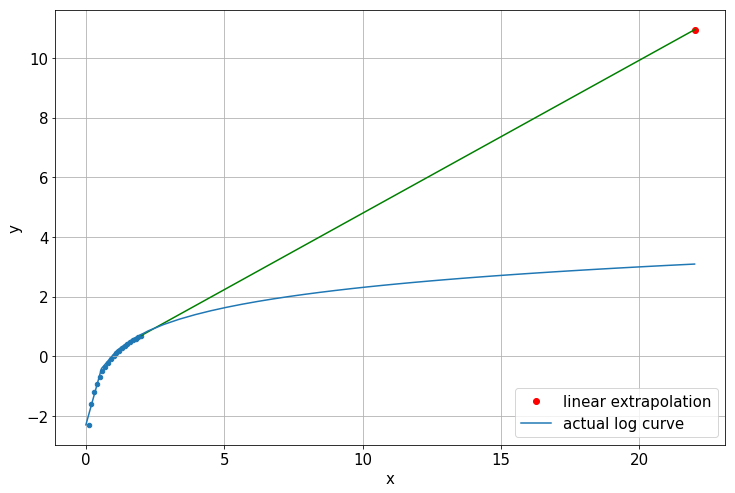

In [15]:
ax = df.plot.scatter('x','y',figsize = (12,8))
ax.plot(val,y_ans, 'ro', label = 'linear extrapolation')
ax.plot([x[idx],val],[y[idx],y_ans],'g-')
ax.plot(np.linspace(0,22,40), np.log(np.linspace(0.1,22,40)),label='actual log curve')
ax.grid()
ax.legend(loc=4)
plt.show()

In [16]:
x

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ])

In [17]:
y

array([ -2.30258509e+00,  -1.60943791e+00,  -1.20397280e+00,
        -9.16290732e-01,  -6.93147181e-01,  -5.10825624e-01,
        -3.56674944e-01,  -2.23143551e-01,  -1.05360516e-01,
        -1.11022302e-16,   9.53101798e-02,   1.82321557e-01,
         2.62364264e-01,   3.36472237e-01,   4.05465108e-01,
         4.70003629e-01,   5.30628251e-01,   5.87786665e-01,
         6.41853886e-01,   6.93147181e-01])

In [18]:
Lin_inter = interpolate.interp1d(x,y,kind='linear',fill_value='extrapolate')

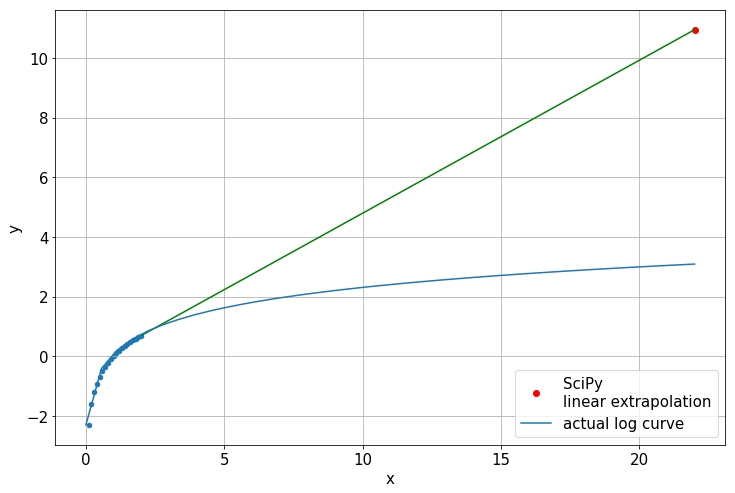

In [19]:
y_sp = Lin_inter(val)
ax = df.plot.scatter('x','y',figsize = (12,8))
ax.plot(val,y_sp, 'ro', label = 'SciPy\nlinear extrapolation')
ax.plot([x[idx],val],[y[idx],y_sp],'g-')
ax.plot(np.linspace(0,22,40), np.log(np.linspace(0.1,22,40)),label='actual log curve')
ax.grid()
ax.legend(loc=4)
plt.show()

# Linear Interpolation for 2-D Data

### Step 0: Generate the data and store in a file

In [20]:
T = np.linspace(50,100,7) #T is for temperature in F
P = np.linspace(100,5000, 11) #P is for pressure in psia
TT, PP = np.meshgrid(T,P)

In [21]:
T

array([  50.        ,   58.33333333,   66.66666667,   75.        ,
         83.33333333,   91.66666667,  100.        ])

In [22]:
P

array([  100.,   590.,  1080.,  1570.,  2060.,  2550.,  3040.,  3530.,
        4020.,  4510.,  5000.])

In [23]:
TT
#TT changes as column changes

array([[  50.        ,   58.33333333,   66.66666667,   75.        ,
          83.33333333,   91.66666667,  100.        ],
       [  50.        ,   58.33333333,   66.66666667,   75.        ,
          83.33333333,   91.66666667,  100.        ],
       [  50.        ,   58.33333333,   66.66666667,   75.        ,
          83.33333333,   91.66666667,  100.        ],
       [  50.        ,   58.33333333,   66.66666667,   75.        ,
          83.33333333,   91.66666667,  100.        ],
       [  50.        ,   58.33333333,   66.66666667,   75.        ,
          83.33333333,   91.66666667,  100.        ],
       [  50.        ,   58.33333333,   66.66666667,   75.        ,
          83.33333333,   91.66666667,  100.        ],
       [  50.        ,   58.33333333,   66.66666667,   75.        ,
          83.33333333,   91.66666667,  100.        ],
       [  50.        ,   58.33333333,   66.66666667,   75.        ,
          83.33333333,   91.66666667,  100.        ],
       [  50.        ,  

In [24]:
PP
#PP changes as row changes

array([[  100.,   100.,   100.,   100.,   100.,   100.,   100.],
       [  590.,   590.,   590.,   590.,   590.,   590.,   590.],
       [ 1080.,  1080.,  1080.,  1080.,  1080.,  1080.,  1080.],
       [ 1570.,  1570.,  1570.,  1570.,  1570.,  1570.,  1570.],
       [ 2060.,  2060.,  2060.,  2060.,  2060.,  2060.,  2060.],
       [ 2550.,  2550.,  2550.,  2550.,  2550.,  2550.,  2550.],
       [ 3040.,  3040.,  3040.,  3040.,  3040.,  3040.,  3040.],
       [ 3530.,  3530.,  3530.,  3530.,  3530.,  3530.,  3530.],
       [ 4020.,  4020.,  4020.,  4020.,  4020.,  4020.,  4020.],
       [ 4510.,  4510.,  4510.,  4510.,  4510.,  4510.,  4510.],
       [ 5000.,  5000.,  5000.,  5000.,  5000.,  5000.,  5000.]])

In [25]:
Mu = ((4e3*np.exp(-1e-3*TT**2)) -PP*5e-2+300)*0.5
# Mu = (1e3*np.exp(-0.00007 * ((TT-32)/1.8 + 273.15)**2)-(5e-4*PP))*20+100

In [26]:
Mu

array([[ 311.66999725,  214.06139014,  170.98725691,  154.71312627,
         149.42795145,  147.94848712,  147.59079986],
       [ 299.41999725,  201.81139014,  158.73725691,  142.46312627,
         137.17795145,  135.69848712,  135.34079986],
       [ 287.16999725,  189.56139014,  146.48725691,  130.21312627,
         124.92795145,  123.44848712,  123.09079986],
       [ 274.91999725,  177.31139014,  134.23725691,  117.96312627,
         112.67795145,  111.19848712,  110.84079986],
       [ 262.66999725,  165.06139014,  121.98725691,  105.71312627,
         100.42795145,   98.94848712,   98.59079986],
       [ 250.41999725,  152.81139014,  109.73725691,   93.46312627,
          88.17795145,   86.69848712,   86.34079986],
       [ 238.16999725,  140.56139014,   97.48725691,   81.21312627,
          75.92795145,   74.44848712,   74.09079986],
       [ 225.91999725,  128.31139014,   85.23725691,   68.96312627,
          63.67795145,   62.19848712,   61.84079986],
       [ 213.66999725,  

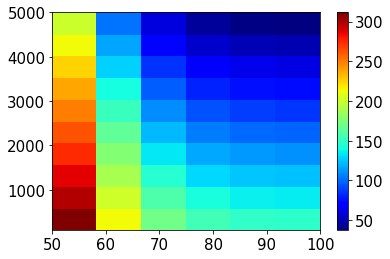

In [27]:
plt.figure()
plt.pcolor(TT,PP,Mu,cmap='jet')
plt.colorbar()
plt.show()

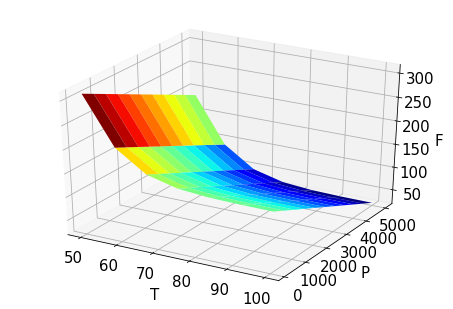

In [28]:
fig = plt.figure(figsize=(6,4))
ax = Axes3D(fig)
ax.plot_surface(TT,PP,Mu,cmap='jet')
ax.set_xlabel('\nT')
ax.set_ylabel('\nP')
ax.set_zlabel('\nF')
# ax.view_init(30,30)
plt.show()

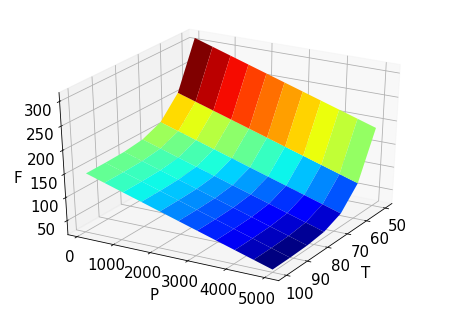

In [29]:
fig = plt.figure(figsize=(6,4))
ax = Axes3D(fig)
ax.plot_surface(TT,PP,Mu,cmap='jet')
ax.set_xlabel('\nT')
ax.set_ylabel('\nP')
ax.set_zlabel('\nF')
ax.view_init(30,30)
plt.show()

In [30]:
TT.shape

(11, 7)

In [31]:
T.shape

(7,)

In [32]:
P.shape

(11,)

In [33]:
Mu.shape

(11, 7)

### Creating a Table
$\begin{bmatrix}
    & T_1 & T_2 & \cdots & T_n \\
P_1 & \mu_{11} & \mu_{12} & \cdots & \mu_{1n}\\
P_2 & \vdots & \vdots & \vdots & \vdots \\
\vdots & \vdots & \vdots & \vdots & \vdots\\
P_m & \mu_{m1} & \mu_{m2} & \cdots & \mu_{mn}
\end{bmatrix}$
<br> and save it to a file (.csv)

In [34]:
df = pd.DataFrame(columns=T,index=P,data=Mu)
df

,50.0,58.3333333333,66.6666666667,75.0,83.3333333333,91.6666666667,100.0
100.0,311.669997,214.06139,170.987257,154.713126,149.427951,147.948487,147.5908
590.0,299.419997,201.81139,158.737257,142.463126,137.177951,135.698487,135.3408
1080.0,287.169997,189.56139,146.487257,130.213126,124.927951,123.448487,123.0908
1570.0,274.919997,177.31139,134.237257,117.963126,112.677951,111.198487,110.8408
2060.0,262.669997,165.06139,121.987257,105.713126,100.427951,98.948487,98.5908
2550.0,250.419997,152.81139,109.737257,93.463126,88.177951,86.698487,86.3408
3040.0,238.169997,140.56139,97.487257,81.213126,75.927951,74.448487,74.0908
3530.0,225.919997,128.31139,85.237257,68.963126,63.677951,62.198487,61.8408
4020.0,213.669997,116.06139,72.987257,56.713126,51.427951,49.948487,49.5908
4510.0,201.419997,103.81139,60.737257,44.463126,39.177951,37.698487,37.3408


In [35]:
df.to_csv('df_plain.csv')

In [36]:
T_first_level = ['Temperature'] * T.shape[0]
P_first_level = ['Pressure'] * P.shape[0]
df_multi_index = pd.DataFrame(columns=[T_first_level,T]
                              ,index=[P_first_level,P],data=Mu)
df_multi_index

Temperature                                                 \
                 50.000000  58.333333   66.666667   75.000000   83.333333    
Pressure 100.0   311.669997  214.06139  170.987257  154.713126  149.427951   
         590.0   299.419997  201.81139  158.737257  142.463126  137.177951   
         1080.0  287.169997  189.56139  146.487257  130.213126  124.927951   
         1570.0  274.919997  177.31139  134.237257  117.963126  112.677951   
         2060.0  262.669997  165.06139  121.987257  105.713126  100.427951   
         2550.0  250.419997  152.81139  109.737257   93.463126   88.177951   
         3040.0  238.169997  140.56139   97.487257   81.213126   75.927951   
         3530.0  225.919997  128.31139   85.237257   68.963126   63.677951   
         4020.0  213.669997  116.06139   72.987257   56.713126   51.427951   
         4510.0  201.419997  103.81139   60.737257   44.463126   39.177951   
         5000.0  189.169997   91.56139   48.487257   32.213126   26.927951   

                                        
                 91.666667  100.000000  
Pressure 100.0   147.948487   147.5908  
         590.0   135.698487   135.3408  
         1080.0  123.448487   123.0908  
         1570.0  111.198487   110.8408  
         2060.0   98.948487    98.5908  
         2550.0   86.698487    86.3408  
         3040.0   74.448487    74.0908  
         3530.0   62.198487    61.8408  
         4020.0   49.948487    49.5908  
         4510.0   37.698487    37.3408  
         5000.0   25.448487    25.0908

In [37]:
df_multi_index.to_csv('df_multi_index.csv')

### Step 1: Load data from file

### Working with regular dataframe (no multi-level indexing)

In [38]:
df_plain_in = pd.read_csv('df_plain.csv',index_col = [0])
df_plain_in

,50.0,58.333333333333336,66.66666666666667,75.0,83.33333333333334,91.66666666666667,100.0
100.0,311.669997,214.06139,170.987257,154.713126,149.427951,147.948487,147.5908
590.0,299.419997,201.81139,158.737257,142.463126,137.177951,135.698487,135.3408
1080.0,287.169997,189.56139,146.487257,130.213126,124.927951,123.448487,123.0908
1570.0,274.919997,177.31139,134.237257,117.963126,112.677951,111.198487,110.8408
2060.0,262.669997,165.06139,121.987257,105.713126,100.427951,98.948487,98.5908
2550.0,250.419997,152.81139,109.737257,93.463126,88.177951,86.698487,86.3408
3040.0,238.169997,140.56139,97.487257,81.213126,75.927951,74.448487,74.0908
3530.0,225.919997,128.31139,85.237257,68.963126,63.677951,62.198487,61.8408
4020.0,213.669997,116.06139,72.987257,56.713126,51.427951,49.948487,49.5908
4510.0,201.419997,103.81139,60.737257,44.463126,39.177951,37.698487,37.3408


In [39]:
#extracting index into numpy array
np.array(df_plain_in.index)

array([  100.,   590.,  1080.,  1570.,  2060.,  2550.,  3040.,  3530.,
        4020.,  4510.,  5000.])

In [40]:
#extracting column name into numpy array
#need 'float64', DataFrame automatically treat
#column name as string
np.array(df_plain_in.columns,dtype='float64')

array([  50.        ,   58.33333333,   66.66666667,   75.        ,
         83.33333333,   91.66666667,  100.        ])

### Working with multi-level indexing dataframe

In [41]:
df_mul_in = pd.read_csv('df_multi_index.csv',header=[0,1],index_col=[0,1])
# index_col is to tell the column where we have rows' name
# header is to tell the row where we have columns' name
df_mul_in 

Temperature                                          \
                       50.0 58.3333333333 66.6666666667        75.0   
Pressure 100.0   311.669997     214.06139    170.987257  154.713126   
         590.0   299.419997     201.81139    158.737257  142.463126   
         1080.0  287.169997     189.56139    146.487257  130.213126   
         1570.0  274.919997     177.31139    134.237257  117.963126   
         2060.0  262.669997     165.06139    121.987257  105.713126   
         2550.0  250.419997     152.81139    109.737257   93.463126   
         3040.0  238.169997     140.56139     97.487257   81.213126   
         3530.0  225.919997     128.31139     85.237257   68.963126   
         4020.0  213.669997     116.06139     72.987257   56.713126   
         4510.0  201.419997     103.81139     60.737257   44.463126   
         5000.0  189.169997      91.56139     48.487257   32.213126   

                                                       
                83.3333333333 91.6666666667     100.0  
Pressure 100.0     149.427951    147.948487  147.5908  
         590.0     137.177951    135.698487  135.3408  
         1080.0    124.927951    123.448487  123.0908  
         1570.0    112.677951    111.198487  110.8408  
         2060.0    100.427951     98.948487   98.5908  
         2550.0     88.177951     86.698487   86.3408  
         3040.0     75.927951     74.448487   74.0908  
         3530.0     63.677951     62.198487   61.8408  
         4020.0     51.427951     49.948487   49.5908  
         4510.0     39.177951     37.698487   37.3408  
         5000.0     26.927951     25.448487   25.0908

In [42]:
df_mul_in.columns

MultiIndex(levels=[['Temperature'], ['100.0', '50.0', '58.3333333333', '66.6666666667', '75.0', '83.3333333333', '91.6666666667']],
           labels=[[0, 0, 0, 0, 0, 0, 0], [1, 2, 3, 4, 5, 6, 0]])

In [43]:
df_mul_in.columns.get_level_values(1)

Index(['50.0', '58.3333333333', '66.6666666667', '75.0', '83.3333333333',
       '91.6666666667', '100.0'],
      dtype='object')

In [44]:
T_in = np.array(df_mul_in.columns.get_level_values(1),dtype = 'float64')
#Note that without dtype = 'float64' it is just string
T_in

array([  50.        ,   58.33333333,   66.66666667,   75.        ,
         83.33333333,   91.66666667,  100.        ])

In [45]:
Mu_in = df_mul_in.values
df_mul_in.values.astype('float64')
#without .astype('float64') it work too
#use .astype('float64') in case where you get string

array([[ 311.66999725,  214.06139014,  170.98725691,  154.71312627,
         149.42795145,  147.94848712,  147.59079986],
       [ 299.41999725,  201.81139014,  158.73725691,  142.46312627,
         137.17795145,  135.69848712,  135.34079986],
       [ 287.16999725,  189.56139014,  146.48725691,  130.21312627,
         124.92795145,  123.44848712,  123.09079986],
       [ 274.91999725,  177.31139014,  134.23725691,  117.96312627,
         112.67795145,  111.19848712,  110.84079986],
       [ 262.66999725,  165.06139014,  121.98725691,  105.71312627,
         100.42795145,   98.94848712,   98.59079986],
       [ 250.41999725,  152.81139014,  109.73725691,   93.46312627,
          88.17795145,   86.69848712,   86.34079986],
       [ 238.16999725,  140.56139014,   97.48725691,   81.21312627,
          75.92795145,   74.44848712,   74.09079986],
       [ 225.91999725,  128.31139014,   85.23725691,   68.96312627,
          63.67795145,   62.19848712,   61.84079986],
       [ 213.66999725,  

In [46]:
Mu_in

array([[ 311.66999725,  214.06139014,  170.98725691,  154.71312627,
         149.42795145,  147.94848712,  147.59079986],
       [ 299.41999725,  201.81139014,  158.73725691,  142.46312627,
         137.17795145,  135.69848712,  135.34079986],
       [ 287.16999725,  189.56139014,  146.48725691,  130.21312627,
         124.92795145,  123.44848712,  123.09079986],
       [ 274.91999725,  177.31139014,  134.23725691,  117.96312627,
         112.67795145,  111.19848712,  110.84079986],
       [ 262.66999725,  165.06139014,  121.98725691,  105.71312627,
         100.42795145,   98.94848712,   98.59079986],
       [ 250.41999725,  152.81139014,  109.73725691,   93.46312627,
          88.17795145,   86.69848712,   86.34079986],
       [ 238.16999725,  140.56139014,   97.48725691,   81.21312627,
          75.92795145,   74.44848712,   74.09079986],
       [ 225.91999725,  128.31139014,   85.23725691,   68.96312627,
          63.67795145,   62.19848712,   61.84079986],
       [ 213.66999725,  

In [47]:
df_mul_in.index.get_level_values(1)

Float64Index([ 100.0,  590.0, 1080.0, 1570.0, 2060.0, 2550.0, 3040.0, 3530.0,
              4020.0, 4510.0, 5000.0],
             dtype='float64')

In [48]:
P_in = np.array(df_mul_in.index.get_level_values(1))
P_in

array([  100.,   590.,  1080.,  1570.,  2060.,  2550.,  3040.,  3530.,
        4020.,  4510.,  5000.])

### Find Mu at T = 70 & P = 3000 from a data file with scipy

In [49]:
P_in.shape

(11,)

In [50]:
T_in.shape

(7,)

In [51]:
Mu_in.shape

(11, 7)

In [52]:
model = interpolate.interp2d(x = T_in, y = P_in, z = Mu_in)
#Usage:  x = [0,1,2];  y = [0,3]; z = [[1,2,3], [4,5,6]]
# x is for column, y is for row of z (mimic graph x,y)
# interpolate.interp2d(x, y, z, kind='linear', 
#     copy=True, bounds_error=False, fill_value=None)

In [53]:
val = (70,3000)
z_pred = model(*val)
z_pred

array([ 91.97760466])

In [54]:
z_pred

array([ 91.97760466])

### Find Mu at T = 70 & P = 3000 from a data file manually
Step 0: need to find x and y that surround point(x,y) of interest first

In [55]:
id_x = np.searchsorted(T_in,val[0]) - 1
id_y = np.searchsorted(P_in,val[1]) - 1
print(id_x,id_y)

2 5


In [56]:
T_in[2]

66.666666666699996

In [57]:
T_in[3]

75.0

In [58]:
P_in[5]

2550.0

In [59]:
P_in[6]

3040.0

In [60]:
Mu_in[5:7,2:4] 
#first index is for P because, 
# P is the index in pandas DataFrame
# while T is the column in pandas DataFrame

array([[ 109.73725691,   93.46312627],
       [  97.48725691,   81.21312627]])

What we are going to do is equivalent to
<br>
$\begin{bmatrix}
 & \text{T_in[2] = 66.6666} & \text{x_target = 70} & \text{T_in[3] = 75.0}\\
\text{P_in[5] = 2550.0} & 109.73725691 & 103.22760465727725 & 93.46312627\\
\text{y_target = 3000} &  & 91.977604657277254 &\\
\text{P_in[6] = 3040.0} & 97.48725691 & 90.977604657277254 & 81.21312627
\end{bmatrix}
$

Step 1: find the z value at x = x_target and y = [y1, y2]
<br>y1 and y2 are y are from the given information

In [61]:
z_y1 = (Mu_in[id_y,id_x] + (Mu_in[id_y,id_x+1] - Mu_in[id_y,id_x])*
            (val[0] - T_in[id_x]) / (T_in[id_x+1] - T_in[id_x])  )
#index id_y for all Mu_in
z_y1

103.22760465727725

In [62]:
z_y2 = (Mu_in[id_y+1,id_x] + (Mu_in[id_y+1,id_x+1] - Mu_in[id_y+1,id_x])*
            (val[0] - T_in[id_x]) / (T_in[id_x+1] - T_in[id_x])  )
#index id_y+1 for all Mu_in
z_y2

90.977604657277254

Step 3: use y1 and y2 to find z value at y_target

In [63]:
z_ans = (z_y1 + (z_y2 - z_y1)*
            (val[1] - P_in[id_y]) / (P_in[id_y+1] - P_in[id_y])  )
z_ans

91.977604657277254

In [64]:
#comparing the result from manual method and scipy method
z_ans == z_pred[0]

False

In [65]:
z_ans - z_pred[0]

-2.8421709430404007e-14

### Very close!

# Simple Cubic Spline (just a curve between 2 dots)
Interpolate by using piecewise third-order polynomial
<font size = 5>
<br>$q = (1-t)y_1 + t y_2 + t(1-t)(a(1-t)+bt)$
<p>$t=\frac{x-x_1}{x_2-x_1}$
<p>$a = k_1(x_2-x_1)-(y_2 - y_1)$
<p>$b = -k_2(x_2 - x_1) + (y_2 - y_1)$
</font>
###  $k$ is the slope
###  $q$ is the function value
### Required given data are
    q(x1) = y1
    q(x2) = y2
    q'(x1) = k1
    q'(x2) = k2
<p> Derivation https://en.wikipedia.org/wiki/Spline_interpolation

### Problem statement: $\text{Find the curve between two dots given location and slope at those points}$
<font size = 4>
<br>$x1 = 0$ $\qquad\quad$ $x2 = 1$
<p>$y1 = 0$ $\qquad\quad$ $y2 = 0$
<p>$f'(x1) = 1$ $\qquad$ $f'(x2) = 1$
</font>

In [66]:
x1 = 0
x2 = 1
y1 = 0
y2 = 0
k1 = 1
k2 = 1
x = np.linspace(-1,2,100)
t = (x-x1)/(x2-x1)
a = k1*(x2 - x1) - (y2 - y1)
b = -k2*(x2 - x1) + (y2 - y1)
q = (1 - t)*y1 + t*y2 + t*(1 - t)*(a*(1 - t) + b*t)

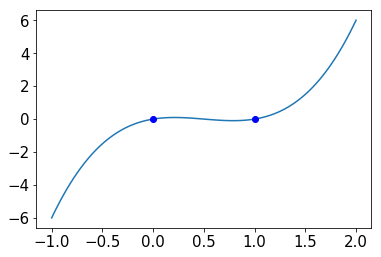

In [67]:
plt.plot(t,q)
plt.plot([x1,x2],[y1,y2],'ob')
plt.show()

### Recheck the slope at x1 and x2 to see if it match with k1 & k2 or not

In [68]:
np.searchsorted(t,1)

66

In [69]:
t[66]

1.0

In [70]:
np.searchsorted(t,0)

33

In [71]:
t[33]

0.0

In [72]:
#Check the slope by using np.gradient
#np.gradient take list of y and x, then
#calculate slope by central finite difference
#for point in the middle

In [73]:
np.gradient(q,t)[66]

1.0018365472910926

In [74]:
np.gradient(q,t)[33]

1.0018365472910926

In [75]:
# Manually checking slope

In [76]:
m1 = (q[66]-q[65])/(t[66]-t[65])
m2 = (q[67]-q[66])/(t[67]-t[66])
m = 0.5*(m1+m2)
m

1.0018365472910928

In [77]:
#our 2nd finite difference central scheme match with what numpy gave

### Simple cubic spline for various slope condition

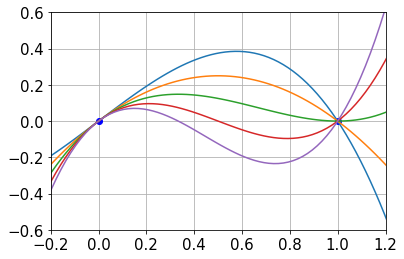

In [78]:
def simple_cubic(x,x1,x2,y1,y2,k1,k2):
    t = (x-x1)/(x2-x1)
    a = k1*(x2 - x1) - (y2 - y1)
    b = -k2*(x2 - x1) + (y2 - y1)
    q = (1 - t)*y1 + t*y2 + t*(1 - t)*(a*(1 - t) + b*t)
    return q

plt.figure()

x1 = 0
x2 = 1
y1 = 0
y2 = 0
plt.plot([x1,x2],[y1,y2],'ob')
for k2 in range(-2,3):
    XX = np.linspace(-0.5,1.5,100)
    q = simple_cubic(XX, x1 = 0,
                    x2 = 1,
                    y1 = 0,
                    y2 = 0,
                    k1 = 1,
                    k2 = k2)
    plt.plot(XX,q)
plt.xlim(-0.2,1.2)
plt.ylim(-0.6,0.6)
plt.grid()
plt.show()

# Full Cubic Spline Interpolation (for multiple points): Manual Approach
## Use Natural boundary condition: $q''(x_0) = q''(x_n) = 0$
<p><font face = "Courier New" size = 5> Piecewise cubic equation will be used to connect points
<p>Properties of cubic spline output:
<p> 1: q(x) is a piecewise continuous function
<p> 2: q'(x) is a piecewise continuous function
<p> 3: q''(x) is a piecewise continuous function
<p> 4: q''(x0) = q''(xn) = 0</font>

## Calculation steop
<font face = "Courier New" size = 5>
<br> Step 0: Specify x and y coordinate of each point
<p>  Step 1: Calculate the slope at each point (to be explained shortly)
<p>  Step 2: Create equation of each interval from the obtained slope
<p>  Step 3: Use equation from step 2 to do interpolation
</font>

## Step 0: Generating input: $input = (x,y)_1, (x,y)_2, ..., (x,y)_n$

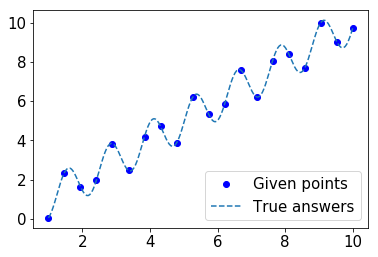

In [79]:
x = np.linspace(1,10,20)
y = np.sin(5*x)+x
plt.plot(x,y,'bo',label = 'Given points')
x_true = np.linspace(1,10,200)
y_true = np.sin(5*x_true)+x_true
plt.plot(x_true,y_true,'--',label = 'True answers')
plt.legend(loc=4)
plt.show()

## Step 1: Calculate slope (k) at each point
<font size = 4>
<br>Slope at each point is from solving system of linear equations. The derivation of the formula for system of linear equation for cubic spline interpolation is not covered. It can be found in https://en.wikipedia.org/wiki/Spline_interpolation
<br>
<br>In short, it is in the form of a tri-diagonal matrix
<p>$B_{0}k_{0} + C_{0} k_{1} = D_{0} \qquad\qquad\quad\:$ For i = 0
<p>$A_{i}k_{i-1} + B_{i}k_{i} + C_{i} k_{i+1} = D_{i} \qquad$ For i = 1 to n-1
<p>$A_{n}k_{n-1} + B_{n}k_{n}= D_{n} \qquad\qquad\:\:$ For i = 0
<p>or
<p>
$\begin{bmatrix}
B_0  & C_0  \\
A_1 & B_1 & C_1 \\
 & \ddots & \ddots & \ddots \\
 &  & \ddots & \ddots & \ddots \\
 &  &  &  A_{n-1} & B_{n-1} & C_{n-1}\\
 &  &  &  & A_n & B_n
\end{bmatrix}
\begin{bmatrix}
k_0\\
k_1\\
k_2\\
\vdots\\
k_{n-1}\\
k_{n}
\end{bmatrix}
=
\begin{bmatrix}
D_0\\
D_1\\
D_2\\
\vdots\\
D_{n-1}\\
D_{n}
\end{bmatrix}
$
<br><br><br><p>The definition of each equations are as follows:
<p><br>
$\begin{align*}
2(x_1-x_0)\:k_0 + (x_1-x_0)\:k_1 & = 3 (y_1-y_0) \\
\frac {k_{i-1}}{x_i-x_{i-1}} + \left(\frac {1}{x_i-x_{i-1}}+ \frac {1}{{x_{i+1}-x_i}}\right) 2k_i+ \frac {k_{i+1}}{{x_{i+1}-x_i}} & =
   3 \left(\frac {y_i - y_{i-1}}{{(x_i-x_{i-1})}^2}+\frac {y_{i+1} - y_i}{{(x_{i+1}-x_i)}^2}\right)\\
(x_n-x_{n-1})\:k_{n-1} + 2(x_n-x_{n-1})\:k_n & = 3 (y_n-y_{n-1})
\end{align*}$
<br><br><br>
$\begin{align*}A_i & = \frac {1}{x_i-x_{i-1}}\\
B_i & = 2 \left(\frac {1}{x_i-x_{i-1}}+ \frac {1}{{x_{i+1}-x_i}}\right)\\
C_i & = \frac {1}{{x_{i+1}-x_i}}\\
D_i & = 3 \left(\frac {y_i - y_{i-1}}{{(x_i-x_{i-1})}^2}+\frac {y_{i+1} - y_i}{{(x_{i+1}-x_i)}^2}\right)
\end{align*}$
</font>

In [80]:
#From the previous example on how to create a sparse tri-diagonal matrix, we have
test = sp.sparse.diags(diagonals=[[10,20,30,40,50],[1,2,3,4],[0.1,0.2,0.3,0.4]],
                       offsets=[0,-1,1])
test.todense()

matrix([[ 10. ,   0.1,   0. ,   0. ,   0. ],
        [  1. ,  20. ,   0.2,   0. ,   0. ],
        [  0. ,   2. ,  30. ,   0.3,   0. ],
        [  0. ,   0. ,   3. ,  40. ,   0.4],
        [  0. ,   0. ,   0. ,   4. ,  50. ]])

In [81]:
B0 = 2*(x[1]-x[0])
C0 = x[1]-x[0]
D0 = 3*(y[1]-y[0])
Ai = [1.0/(x[i]-x[i-1]) for i in range(1,len(x)-1)]
Bi = [2 * (1.0/(x[i]-x[i-1]) + 1/(x[i+1]-x[i])) for i in range(1,len(x)-1)]
Ci = [1.0/(x[i+1]-x[i]) for i in range(1,len(x)-1)]
Di = [3*((y[i]-y[i-1])/(x[i]-x[i-1])**2 + (y[i+1]-y[i])/(x[i+1]-x[i])**2)
      for i in range(1,len(x)-1)]
n = len(x) - 1 # the index is from 0 to n-1, not to n
An = x[n]-x[n-1]
Bn = 2*(x[n]-x[n-1])
Dn = 3*(y[n]-y[n-1])
AA = Ai+[An] # + operation for list is concatenation (similar to .append)
BB = [B0] + Bi + [Bn]
CC = [C0] + Ci
DD = [D0] + Di + [Dn]
CSpline = sp.sparse.diags(diagonals=[BB,AA,CC], offsets=[0,-1,1])
#Solve AA*KK = DD, solve for KK or vector of slope
KK = sp.sparse.linalg.spsolve(CSpline.tocsc(),DD)
#sp.sparse.linalg.spsolve accept the sparse matrix in the csc and csr formats
#not the diagonal format

In [82]:
KK.shape

(20,)

## Step 2 + 3: Use simple cubic function to generate interpolation line

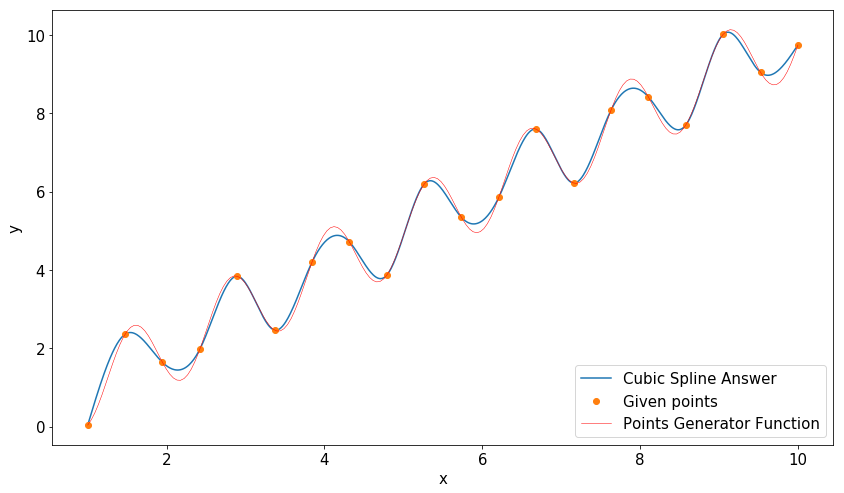

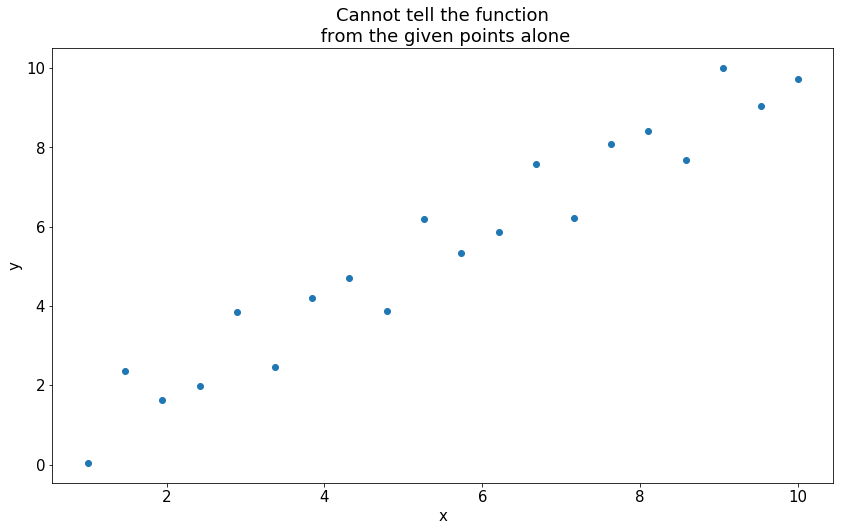

In [83]:
#i is for starting index of an interval
x_tot = np.array([])
q_tot = np.array([])
for i in range(KK.shape[0]-1):
    xx = np.linspace(x[i],x[i+1],51)
    qq = simple_cubic(xx,x[i],x[i+1],y[i],y[i+1],KK[i],KK[i+1])
    x_tot = np.r_[x_tot,xx] # np.r_[] is to append numpy arrays together
    q_tot = np.r_[q_tot,qq]
plt.figure(figsize=(14,8))
plt.plot(x_tot,q_tot,label = 'Cubic Spline Answer')
plt.plot(x,y,'o', label = 'Given points')
plt.plot(x_true,y_true,'r-',linewidth = 0.5, label = 'Points Generator Function')
plt.legend(loc=4)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.figure(figsize=(14,8))
plt.plot(x,y,'o', label = 'Given points')
plt.title("Cannot tell the function\n from the given points alone")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Full Cubic Spline with automatic function (Scipy)

In [84]:
model = sp.interpolate.CubicSpline(x,y,bc_type='natural')

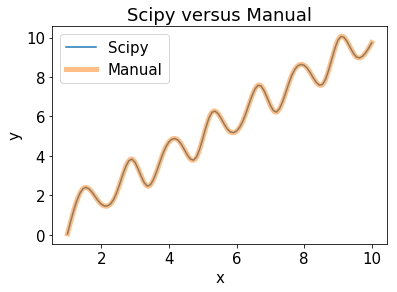

In [85]:
y_pred = model(np.linspace(1,10,100))
plt.plot(np.linspace(1,10,100),y_pred, label='Scipy')
plt.title('Scipy versus Manual')
plt.plot(x_tot,q_tot,label = 'Manual',linewidth=5,alpha = 0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Slope / Integration result from `scipy.interpolation.CubicSpline`

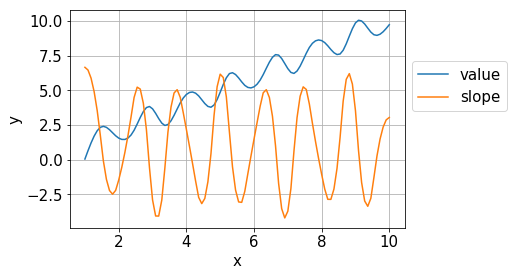

In [86]:
y_slope_pred = model(np.linspace(1,10,100),nu=1)
plt.plot(np.linspace(1,10,100),y_pred, label='value')
plt.plot(np.linspace(1,10,100),y_slope_pred, label='slope')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(bbox_to_anchor=(1., 0.8))
plt.grid()
plt.show()

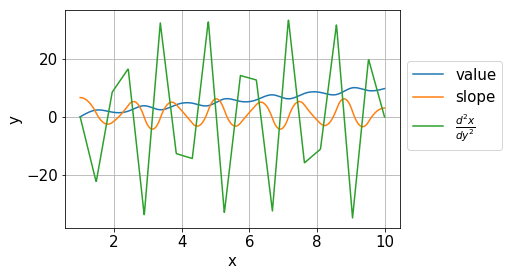

In [87]:
y_pred = model(np.linspace(1,10,1000))
y_slope_pred = model(np.linspace(1,10,1000),nu=1)
y_slope2_pred = model(np.linspace(1,10,1000),nu=2)
plt.plot(np.linspace(1,10,1000),y_pred, label='value')
plt.plot(np.linspace(1,10,1000),y_slope_pred, label='slope')
plt.plot(np.linspace(1,10,1000),y_slope2_pred, label='$\\frac{d^2x}{dy^2}$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(bbox_to_anchor=(1., 0.8))
plt.grid()
plt.show()

## Derivative comparison: Cubic spline vs Analytical Solution

In [88]:
xsym = sympy.symbols('x')
diff_result = sympy.diff(xsym + sympy.sin(5*xsym), xsym)
sympy.init_printing(use_unicode=True)
diff_result

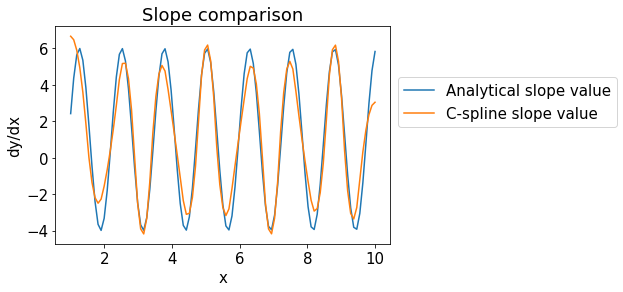

In [89]:
dif_fn = sympy.lambdify('x', diff_result)
x_diff = np.linspace(1,10,101)
y_analy = np.array(list(map(dif_fn,x_diff)))
y_cubic = model(x_diff,nu=1)
plt.plot(x_diff,y_analy, label = 'Analytical slope value')
plt.plot(x_diff,y_cubic, label = 'C-spline slope value')
plt.title('Slope comparison')
plt.xlabel('x')
plt.ylabel('dy/dx')
plt.legend(bbox_to_anchor = (1,0.8))
plt.show()

In [90]:
(y_cubic - y_analy).mean()

In [91]:
(y_cubic - y_analy).max()

In [92]:
(y_cubic - y_analy).std()

In [93]:
rela_er = (y_cubic - y_analy) / y_analy * 100
print('Relative error in slope calculation is about {:.3f}% on average'.format(rela_er.mean()))
print('with the median of {:.3f}%'.format(np.median(rela_er)))

Relative error in slope calculation is about -10.144% on average
with the median of -13.276%


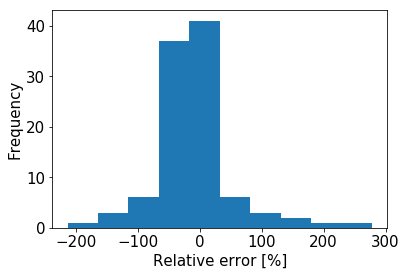

In [94]:
plt.hist((y_cubic - y_analy) / y_analy * 100)
plt.ylabel('Frequency')
plt.xlabel('Relative error [%]')
plt.show()

## Integration result comparison
## Analytical versus approximation from cubic spline

In [95]:
model.integrate(1,5)

array(11.946398953852404)

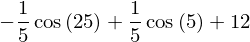

In [96]:
xsym = sympy.symbols('x')
result = sympy.integrate(xsym + sympy.sin(5*xsym), (xsym,1,5))
result

In [97]:
result.evalf()

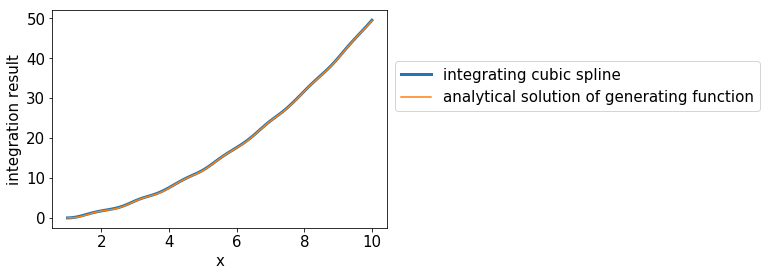

In [98]:
ysym = sympy.symbols('y')
int_result = sympy.integrate(xsym + sympy.sin(5*xsym), (xsym,1,ysym))
sm_func = sympy.lambdify('y',int_result)

x_inte = np.linspace(1,10,101)
y_inte = [model.integrate(1,i) for i in x_inte]
y_sm = [sm_func(i) for i in x_inte]
plt.plot(x_inte, y_inte,linewidth = 3, label = 'integrating cubic spline')
plt.plot(x_inte, y_sm, label = 'analytical solution of generating function')
plt.ylabel('integration result')
plt.xlabel('x')
plt.legend(bbox_to_anchor = (1,0.8))
plt.show()

In [99]:
sp.linalg.norm(np.array(y_sm) - np.array(y_inte))

In [100]:
(np.array(y_sm) - np.array(y_inte)).mean()

In [101]:
((np.array(y_sm) - np.array(y_inte))/np.array(y_sm).max()*100).mean()

In [102]:
#on average, the error is about -0.076

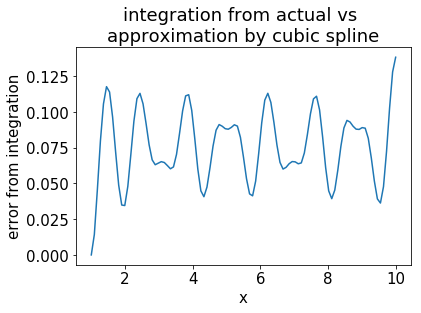

In [103]:
plt.plot(x_inte,np.array(y_inte) - np.array(y_sm))
plt.title('integration from actual vs \napproximation by cubic spline')
plt.ylabel('error from integration')
plt.xlabel('x')
plt.show()

In [104]:
# Sometimes cubic spline over-estimate
# sometimes under-estimate

/home/me/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


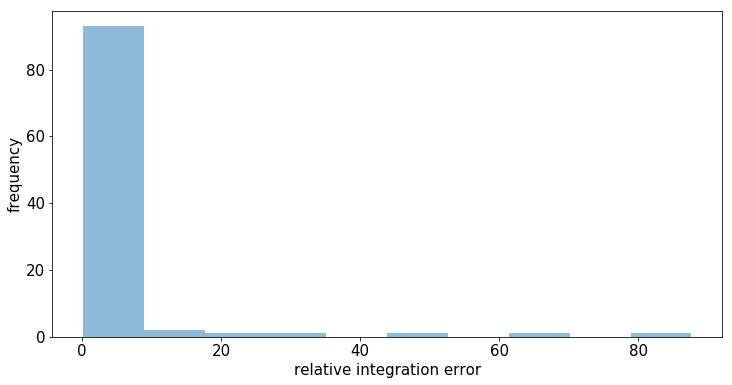

average relative error = 3.790%


In [105]:
plt.figure(figsize=(12,6))
IntErr = ((np.array(y_inte)-np.array(y_sm))/np.array(y_sm)) * 100
IntErr = IntErr[~np.isnan(IntErr)]
plt.hist(IntErr,alpha = 0.5)
plt.ylabel('frequency')
plt.xlabel('relative integration error')
plt.show() 
print('average relative error = {:.3f}%'.format(IntErr.mean()))